In this (relaxed) tutorial, the goal is to explore the difference between K-Means and GMM on different data sets, which are more or less separable.  

For this, the data is generated artificially.  We'll assume each cluster is generated by a Normal (Gaussian) law. 

These data points live in two dimensions, so as to ease graphical representation

# Data generation and clustering

In [107]:
# imports
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import random
np.random.seed(3) # for reproducibility

## "gaussian" generation

We'll use *np.random.multivariate_normal()*
- Read the docs !!
- We'll generate two batches of points (each batch stands for 1 class) :
    - 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
    - 500 points drawn from a gaussian of average (0,0) and diagonal variance (1,1). 
- Generate the points, then represent them in two ways:
    - with a single color
    - with a different color for each cluster 

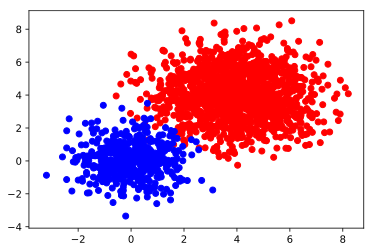

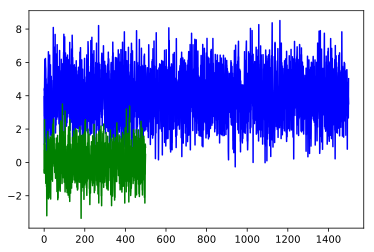

In [100]:
mu1, mu2 = [4,4],[0,0]
sig1,sig2 = [[2,0],[0,2]], [[1,0],[0,1]]

s1 = np.random.multivariate_normal(mu1,sig1, 1500)
s2 = np.random.multivariate_normal(mu2,sig2, 500)
plt.scatter(s1[:,0],s1[:,1], color = "red")
plt.scatter(s2[:,0],s2[:,1], color = "blue")
plt.show()
plt.plot(s1, color = "blue")
plt.plot(s2, color = "green")
plt.show()

Can you predict what the Kmeans clustering will produce ?

## Clustering 

- Cluster the data using $K=2$
- Draw the results
- Compute the  *"error"* of the clustering, *by hand* (not using scikit-learn's routines)
- Do the same with a GMM, still with $K=2$, compare graphically and quantitatively the results.
- Represent the data so that:
    - in blue, point classified the same way by K-means and GMMs.
    - in red, points that are classified differently
What do you notice ?

In [64]:
K=2
clusters=[[] for i in range(K)]
means = np.random.randn(K)
print(means)

for i in range(10):
    clusters=[[] for i in range(K)]
    for x in s1:
        m_min = 10000000
        idx=0
        for i in range(len(means)):
            r = abs(x-means[i])
            if(r<m_min):
                m_min=means[i]
                idx=i
            clusters[idx].append(x)

    for x in s2:
        m_min = 10000000
        idx=0
        for i in range(len(means)):
            r = abs(x-means[i])
            if(r<m_min):
                m_min=means[i]
                idx=i
            clusters[idx].append(x)

    for i in range(len(clusters)):
        if(len(clusters[i])>0):
            means[i]=sum(clusters[i])/len(clusters[i])

    print(means)
    print(len(clusters[0]),len(clusters[1]))


[ 0.11097777 -0.29064898]
[ 2.99987682 -0.29315614]
(3961, 39)
[ 3.5192724   0.66544238]
(3227, 773)
[ 3.52085732  1.87108083]
(2659, 1341)
[ 3.23070578  2.62867709]
(2253, 1747)
[ 2.91002382  3.04431668]
(2280, 1720)
[ 2.71432198  3.34833767]
(2401, 1599)
[ 2.60008472  3.57022992]
(2484, 1516)
[ 2.53243485  3.72106257]
(2535, 1465)
[ 2.50030595  3.79881651]
(2560, 1440)
[ 2.48131045  3.85065402]
(2579, 1421)


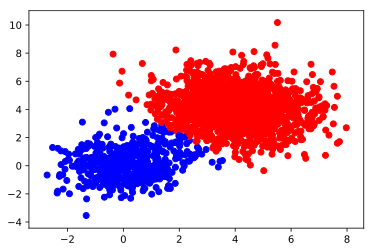

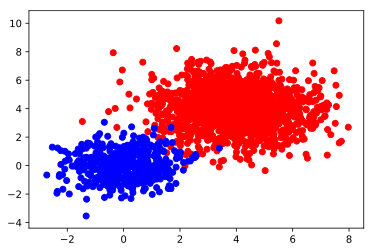

(1454, 546)


In [114]:
s1 = np.random.multivariate_normal(mu1,sig1, 1500)
s2 = np.random.multivariate_normal(mu2,sig2, 500)
s = np.concatenate((s1,s2), axis=0)
kmeans_classifier = KMeans(n_clusters=K, random_state=0).fit(s)
c1=0
c2=0
res_kmeans = []
for x in s:
    res_kmeans.append(classifier.predict(x.reshape(1,-1)))
#     if(l[0]==0):
#         plt.plot(x,np.arange(0,2000),'bo')
#     else:
#         plt.plot(x,'ro')
for x,l in zip(s, res_kmeans):
    if(l[0]==0):
        plt.scatter(x[0],x[1],color='red')
        c1+=1
    else:
        plt.scatter(x[0],x[1],color='blue')
        c2+=1
plt.show()
plt.scatter(s1[:,0],s1[:,1], color = "red")
plt.scatter(s2[:,0],s2[:,1], color = "blue")
plt.show()
print(c1,c2)

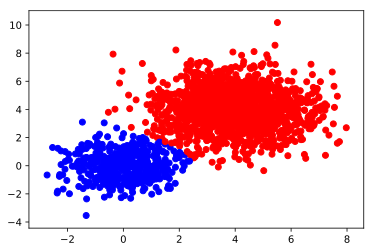

In [116]:
gmm_classifier = GaussianMixture(K).fit(s)
res_gmm = []
for x in s:
    res_gmm.append(gmm.predict(x.reshape(1,-1)))
    
for x,l in zip(s, res_gmm):
    if(l[0]==0):
        plt.scatter(x[0],x[1],color='blue')
    else:
        plt.scatter(x[0],x[1],color='red')
        
plt.show()

# A bit harder 

to make the tash more difficult (for the algorithm, not you), we're going to change genreating parameters:
- 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
- 500 points drawn from a gaussian of average (0,**4**) and diagonal variance (1,1). 

With these new data : 
- Re-do the previous question, compare results
- If we increase the cluster number to 3 and then to 4, what do we notice, when using GMMs ?

Repeat these experiments with the following generating parameters:
- 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
- 500 points drawn from a gaussian of average (0,4) and diagonal variance (**4,0.1**).


What is the main criticism you should make on this tutorial ? (think of the methods compared and the synthetic data generation) ?